# Putting the "K" in KMeans #

Machine Learning with scikit-learn is easy. All the algorithms and helper functions that you might need are included as part of it. You'll still need to gather and clean your data. You'll need to know what algorithm to use and how to tune it for the specific problem that you are working on.

### References: ###
* [How to Determine the Optimal K for K-Means by Khyati Mahendru](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

## Refresher ##

Load and cluster the Geyser dataset. We already know that the data is clean, so you can skip those steps. But you do need to normalize the data before running KMeans. You may use SKLearn for all of this.

In [2]:
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


[]

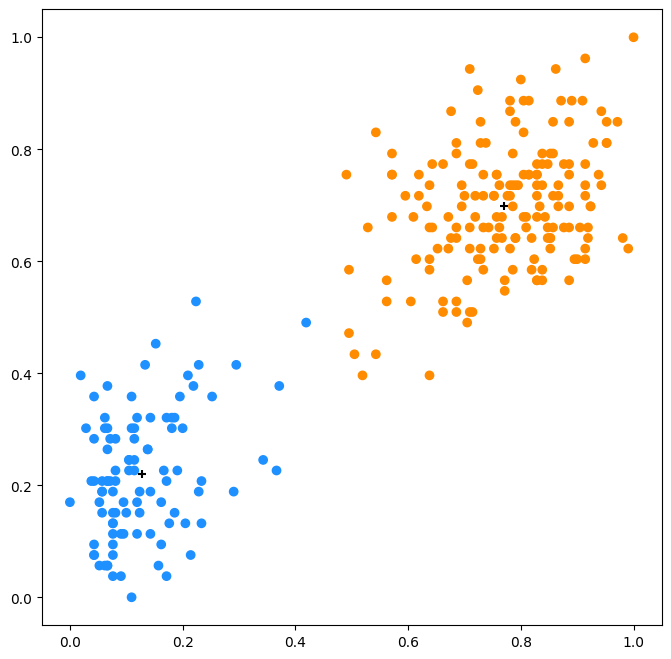

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# Read in the same Old Faithful Geyser data that we used before
# Filter the data to make it easier to user and then normalie it.

df = pd.read_csv('old_faithful_geyser_eruption_time.csv')
df.rename(columns={"Eruption time":"Eruption", "Waiting time":"Waiting"}, inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)

scaler = MinMaxScaler()
df[['Waiting', 'Eruption']] = scaler.fit_transform(df[['Waiting', 'Eruption']])


# Define the model: K-Means with 2 clusters
# Fit the model to the data: runs K-Mean to find centroids
# Assign "new" samples to each centroid; for data-mining, we often just use the original data

km = KMeans(n_clusters=2, max_iter=10)
km.fit(df[['Eruption', 'Waiting']])
centroids = km.cluster_centers_
df['Clusters'] = km.predict(df[['Eruption', 'Waiting']])


# Plot the clusters and centroids
# We must map cluster labels to colors

colors = ("dodgerblue", "darkorange")
plt.figure(figsize=(8,8))
plt.scatter(df['Eruption'], df['Waiting'], c=[colors[clus_id] for clus_id in df['Clusters']])
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
plt.plot()

## Choosing the Right K-Value ##

For these simple 2-D models, it's pretty easy for us to determine the ideal value for `k` by looking at the plot. But that technique won't work for more complicated datasets. However, there is a way that we can mathematically determine a k-value that is *likely* to be optimal.

We choose a reasonable k-value by calculating the Within-Cluster Sum of Squared Errors (WSSE), which measures the overall size of each cluster. We define the size of a cluster to be the sum of the distances from the centroid to each sample in the cluster. Small, dense clusters will lead to lower scores (e.g., low scores are good).

To choose the optimal k-value, we create a series of KMeans models each with a different number of clusters, starting at 1 and going to some upper maximum. For each of these models, we calculate the WSSE score and plot the results. As more clusters are added (e.g., `k` increases), the WSSE score decreases. Since lower scores indicate better models, we look towards the lower end. But as you keep adding clusters, there is a point of diminishing returns. This point is close to where the curve flattens out and is called the "elbow" of the curve. In some situations the elbow is very pronounced and in others it is more nuanced.

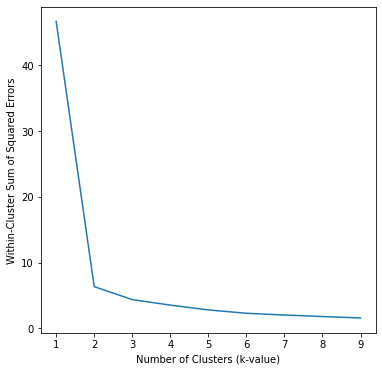

### Calculating WSSE with SKLearn ###

It took quite a few steps to calculate the Within-Cluster Sum of Squared Errors (WSSE) by hand. Why recreate the wheel if SciKit-Learn already calculates the WSSE for us? Not to worry, KMeans stores the WSSE in a variable called `inertia_`

Also, the good news is that WSSE is an $O(n)$ algorithm.

In [4]:
km = KMeans(n_clusters=2, max_iter=10)
km.fit(df[['Eruption', 'Waiting']])
wsse = km.inertia_
wsse

6.340439792650664

In [5]:
km = KMeans(n_clusters=3, max_iter=10)
km.fit(df[['Eruption', 'Waiting']])
wsse = km.inertia_
wsse

5.286155879588621

In [6]:
km = KMeans(n_clusters=4, max_iter=10)
km.fit(df[['Eruption', 'Waiting']])
wsse = km.inertia_
wsse

3.8094487527677585

In [7]:
km = KMeans(n_clusters=5, max_iter=10)
km.fit(df[['Eruption', 'Waiting']])
wsse = km.inertia_
wsse

2.8128774648049757

## Exercise ##

Can we automate the technique to work with more generic datasets where the solution is not so obvious? Let's try generating random blobs of data. We'll use a function from SciKit-Learn that creates handy test data. The function can create a random number of blobs so that we don't actually know the correct number of clusters. Instead, we can detect a reasonable value using the WSSE Elbow Method.

### Calculating WWSE for Random Dataset ###

Use [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) from to create a random dataset with anywhere from 5-15 clusters. Then write the code to generate a WSSE Elbow Plot.
 * n_features=2 so that we can plot the graph in 2D space
 * cluster_std=0.6 some of the clusters will likely overlap... try playing with this value
 * centers=# is how we set the number of clusters

After the code is done, you'll need to analyze the plot and pick the best number of clusters. Create a KMeans model with the best k-value and plot the resulting clusters. Did your WSSE Elbow Plot provide a good value for `k`?


Original Cluster Count: 11


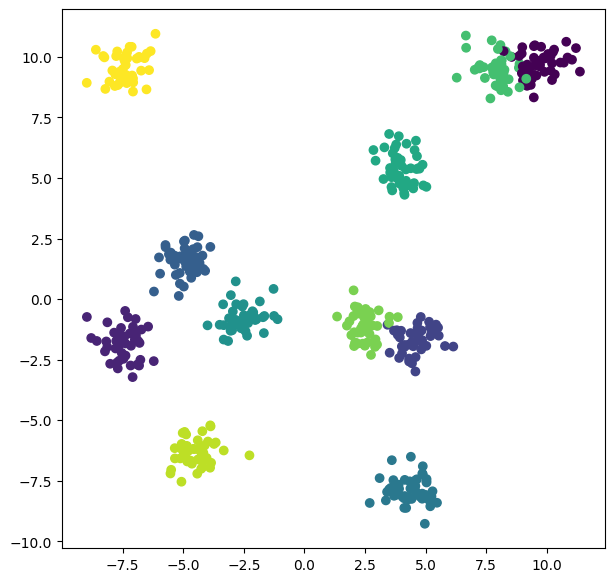

In [8]:
import random
from sklearn.datasets import make_blobs

cluster_count = random.randint(5, 15)
print("Original Cluster Count: {}".format(cluster_count))

# In machine learning, the input features are usually called "X" and the output labels are called "y"
# Note that X may have many dimensions... it is not the same as the x-axis (a single dimension)

plt.figure(figsize=(7,7))
(X, y) = make_blobs(n_samples=500, n_features=2, cluster_std=0.6, centers=cluster_count)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

[18514.1422025843, 9945.48686240441, 5105.649468000096, 3877.1259779455363, 2577.3463733280814, 2000.968553486749, 772.4450634321892, 661.7969603664928]
2577.3463733280814 6


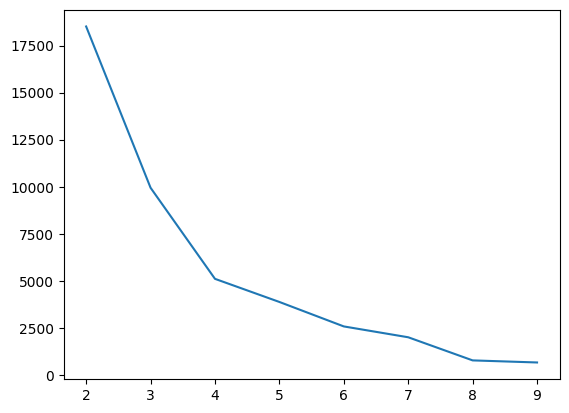

In [9]:
# CALCULATE WSSE FOR A RANGE OF POSSIBLE K-VALUES
results = []
i_s = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, max_iter=10)
    km.fit(X)
    results.append(km.inertia_)
    i_s.append(i)

print(results)
print(results[len(results)//2], i_s[len(i_s)//2])

plt.plot(i_s, results)
plt.show()

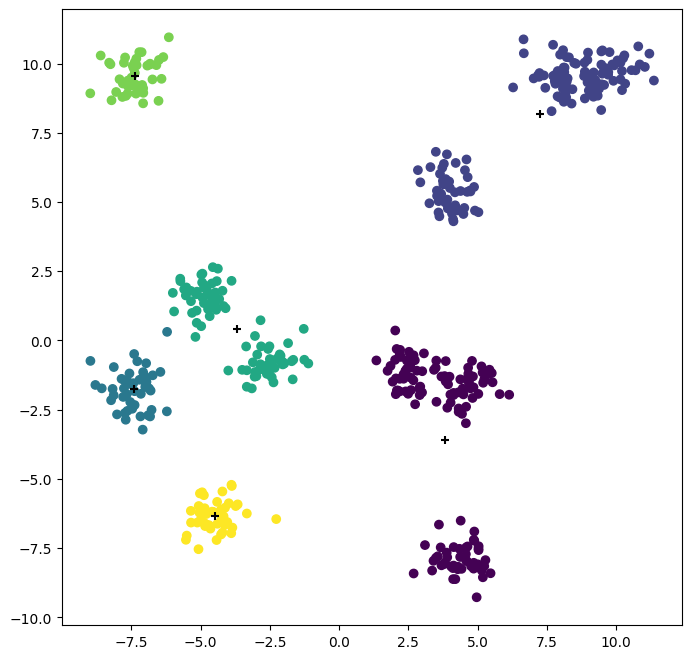

In [10]:
# SET CLUSTER COUNT HERE BASED ON RESULTS OF WSSE ELBOW
cluster_count = 6

km = KMeans(n_clusters=cluster_count, max_iter=25)
km.fit(X)

centroids = km.cluster_centers_
clusters = km.predict(X)

fig = plt.figure(figsize=(8, 8))
plt.scatter(x=X[:,0], y=X[:,1], c=clusters)
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
plt.show()

In [71]:
(X, y) = make_blobs(n_samples=500, n_features=2, cluster_std=0.6, centers=random.randrange(5, 15))

def calculate_wsse(X) -> np.ndarray:
    results = np.zeros((15-5,2))
    
    j = 0
    for i in range(5, 15):
        km = KMeans(n_clusters=i, max_iter=10)
        km.fit(X)
        results[j] = [i, km.inertia_]
        j += 1
    
    return results

import math
def calculate_wsse_slopes(results: np.ndarray) -> int:
    ''' 
    gets decreasing slopes of wsse scores and finds the index of the elbow point below threshold, if any
    Parameters:
        results: np.ndarray of wsse scores
        threshold: float, default=100, the threshold to find the elbow point
    Returns:
        float: the index of the elbow point below threshold, or the index of max value of all slopes
    '''
    slopes = []

    for i in range(0, len(results)-1):
        slope = results[i+1][1] - results[i][1]
        slopes.append(slope)

    for i in range(1, len(slopes)):
        # threshold slope difference to categorize as elbow
        if abs(slopes[i-1]) - abs(slopes[i]) > 150:
            print(slopes[i], results[i])
            return results[i]

    # a guess if there is no elbow point over threshold
    return results[1]

results = calculate_wsse(X)
print(results)
slopes = calculate_wsse_slopes(results)

print(slopes)

[[   5.         3462.65642778]
 [   6.         1986.75704999]
 [   7.         1729.07137781]
 [   8.         1418.63632467]
 [   9.          972.47913047]
 [  10.          874.59383402]
 [  11.          554.55648063]
 [  12.          603.49622176]
 [  13.          337.53331686]
 [  14.          326.68585808]]
-257.68567218204385 [   6.         1986.75704999]
[   6.         1986.75704999]


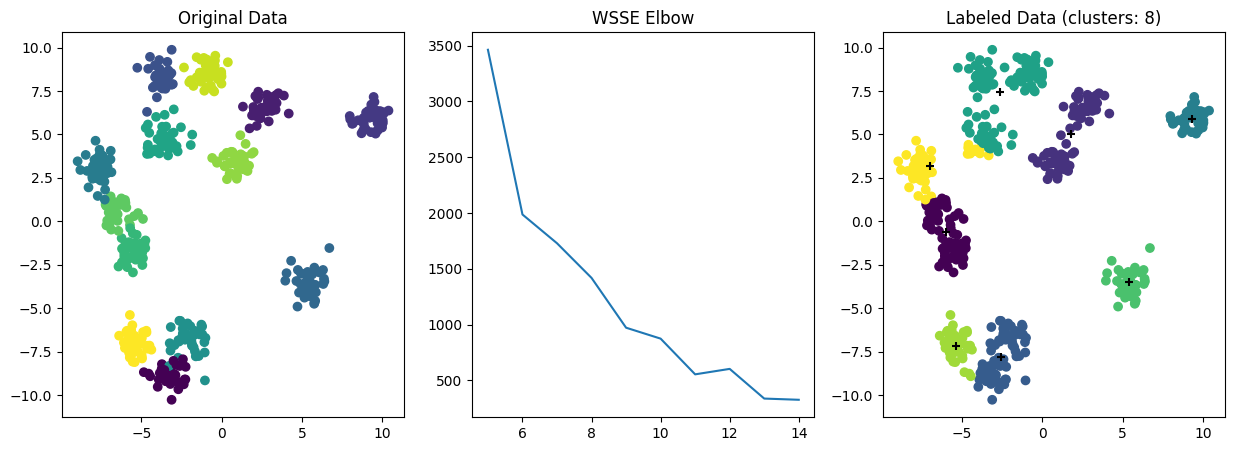

In [72]:

cluster_count = 8

km = KMeans(n_clusters=cluster_count, max_iter=20)
clusters = km.fit_predict(X)
centroids = km.cluster_centers_

import matplotlib.pyplot as plt

f, axis = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axis[0]
# ax2 = axis[1]
ax3 = axis[1]

ax1.set_title("Original Data")
ax1.scatter(X[:,0], X[:,1], c=y)

# ax2.set_title("WSSE Elbow")
# ax2.plot(results[:,0], results[:,1])

ax3.set_title(f"Labeled Data (clusters: {cluster_count})")
ax3.scatter(x=X[:,0], y=X[:,1], c=clusters)
ax3.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')

plt.show()